In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV

In [2]:
dataset=pd.read_excel('Case.xlsx',sheet_name='initial')

In [50]:
data=dataset.values

array=[]
for i in data:
    if i[0]==9:
        array.append(list(i))
    data=np.array(array)

X =data[:,1:18]  #1:18 8:10
Y =data[:,19]  #19 20
seed=random.randint(0,1000)
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

========================================

In [51]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=15000,n_jobs= -1 ,random_state=0)
#oob_score=True 袋外数据，否则基尼系数
RFC.fit(X,Y)
#构造随机森林，拟合数据。
import_level = RFC.feature_importances_ #这个方法可以调取关于特征重要程度
x_columns = ['SI','LIFT','SWEAT','KI','CROSS','VERT','TOT','CAPE',
            'CI','BRi','LCLT','LCLP','PTMML','MRMML','PW','Thick','VWS']
index = np.argsort(import_level)[::-1]
for each in range(X.shape[1]):
    print('The important level of '+ x_columns[index[each]]+ ':      '+ str(import_level[index[each]]))
#对于最后需要逆序，个人的理解是做了类似决策树回溯的取值。从叶子收敛到根，根部重要程度高于叶子。

The important level of SI:      0.11023185216983811
The important level of KI:      0.11000711862669149
The important level of LIFT:      0.08832323455637532
The important level of TOT:      0.08252358120163242
The important level of CROSS:      0.07017139211404469
The important level of SWEAT:      0.0682129550655171
The important level of CAPE:      0.06439145811611231
The important level of VERT:      0.060527564975613665
The important level of LCLP:      0.04870976966810702
The important level of MRMML:      0.04296214402625193
The important level of Thick:      0.04216446911018686
The important level of CI:      0.041184660163827755
The important level of PW:      0.040302414676636866
The important level of PTMML:      0.038899738514035574
The important level of BRi:      0.038475127008715075
The important level of LCLT:      0.03236028862418813
The important level of VWS:      0.020552231382225623


([<matplotlib.axis.XTick at 0x1fa5bed2f10>,
 [Text(0, 0, 'SI'),
  Text(1, 0, 'KI'),
  Text(2, 0, 'LIFT'),
  Text(3, 0, 'TOT'),
  Text(4, 0, 'CROSS'),
  Text(5, 0, 'SWEAT'),
  Text(6, 0, 'CAPE'),
  Text(7, 0, 'VERT'),
  Text(8, 0, 'LCLP'),
  Text(9, 0, 'MRMML'),
  Text(10, 0, 'Thick'),
  Text(11, 0, 'CI'),
  Text(12, 0, 'PW'),
  Text(13, 0, 'PTMML'),
  Text(14, 0, 'BRi'),
  Text(15, 0, 'LCLT'),
  Text(16, 0, 'VWS')])

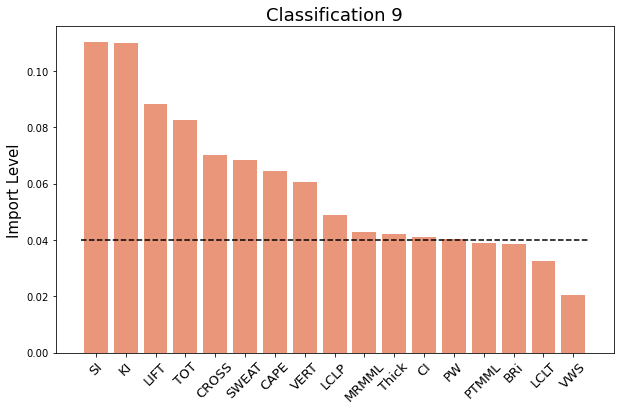

In [52]:
#最后在可视化以下图
plt.figure(figsize=(10,6))
plt.title('Classification 9',fontsize = 18)
plt.ylabel('Import Level',fontsize = 15,rotation = 90)

labels = [x_columns[i] for i in index]

plt.bar(range(0,17),import_level[index],color = 'darksalmon',align = 'center')
#水平分割线
plt.hlines(0.04,-0.5,16.5,'k', linestyles='--')
plt.xticks(range(0,17),labels,rotation = 45,fontsize = 13)

=================================================

特征选择就是从原始特征中选取一些最有效的特征来降低维度,，提高模型泛化能力减低过拟合的过程，主要目的是剔除掉无关特征和冗余特征，选出最优特征子集；

常见的特征选择方法可以分为3类：过滤式（filter）、包裹式（wrapper）、嵌入式（embedding）。

# 1.过滤式filter

通过方差选择法、相关系数法、卡方检验法、互信息法来对特征进行评分，设定阈值或者待选择的阈值的个数来选择；

### 1.1方差选择法

计算各个特征的方差，剔除小于设定的阈值的特征，剔除特征值 波动较小的特征，例如一个特征的所有值都为1，那这个特征对于预测目标变量就没什么作用；方法很简单，但实际应用中只有少数变量才会存在只取某个值的情况，对特征选择作用比较小，可以当做数据预处理部分，之后再用其他方法进行特征选择。

### 1.2  单变量特征选择

**1.2.1相关系数法**

皮尔森相关系数衡量的是变量之间的线性相关性，取值范围在-1-+1之间，-1表示完全负相关，+1表示完全正相关，0表示线性无关；可以使用scipy的pearsonr 计算皮尔森相关系数，且它还可以同时计算出p值

但是皮尔森相关系数只衡量线性关系，即使两个变量之间有较强的非线性关系，皮尔森系数也有可能接近为0；

**1.2.2.卡方检验法**

检验定性自变量对定性因变量的相关性

**1.2.3 互信息法和最大信息系数**

互信息法并不方便直接用于特征选择，一是因为它不属于度量方式，也没有办法进行归一化，在不同的数据上的结果无法做比较；二是因为对于连续变量的计算不是很方便，通常需要将变量离散化，而互信息的结果对离散化的方法很敏感；

因此引入了最大信息系数 。最大信息系数首先寻找一种最优的离散方式，然后把互信息取值转换成一种度量方式，取值区间在[0,1]，minepy模块提供了MIC（最大信息系数）方法

**1.2.4 距离相关系数法**

距离相关系数是为了克服皮尔森相关系数只能衡量线性关系的弱点而生的。x和x^2的皮尔森相关系数可能接近于0，但是这两个变量并不是独立不相关的。使用距离相关系数就可以计算x和x^2的非线性关系，如果距离相关系数接近于0，就可以说两个变量之间是独立的。R语言的energy包提供了距离相关系数的函数，Python没有直接计算的包

# 2.包裹式Wrapper

根据预测效果(AUC/MSE)或者其他方法对特征组合进行评分，主要方法有递归特征消除法；

递归特征消除法的主要思想是反复的构建模型，然后选出最好或最坏的特征，把选出的特征放到一边，然后在剩余的特征上重复这个过程，直到所有特征都遍历了。在这个过程中特征被消除的次序就是特征的排序。

# 3.嵌入式Embedded

### 3.1正则化

正则化主要包括L1正则化和L2正则化：

L1正则化将系数W的L1范数作为惩罚项加到损失函数中，L1正则方法具有稀疏解的特性，因此天然具有特征选择的特性，但是不代表没被选到的特征就不重要，有可能是因为两个高度相关的特征最后只保留了一个；另外L1正则化和非正则化模型一样是不稳定的，如果特征集合中具有相关联的特征，当数据发生细微变化时也有可能导致很大的模型差异。

L2正则化将系数向量的L2范数添加到损失函数中，由于L2惩罚项中的系数是二次方的，会让系数的取值变得平均，对于有相关性的变量，会得到相近的系数；L2正则化也较L1稳定；

### 3.2树模型

可以利用随机森林或者GBDT模型进行特征选择

=================================================

In [4]:
#from imblearn.under_sampling import CondensedNearestNeighbour
#cnn = CondensedNearestNeighbour(random_state=0)
#X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)

In [5]:
#from sklearn.ensemble import RandomForestClassifier
#print(X_resampled.shape)
#seed_1=random.randint(1,1000)
#estimator = RandomForestClassifier(n_estimators=161,
#                                     max_depth=49,
#                                     max_features="sqrt",
#                                     random_state=seed_1)
#selector = RFECV(estimator, step=1, cv=5)
#selector = selector.fit(X_resampled, y_resampled)
#print(selector.support_)
#support_:筛选特征的布尔编码
#print(selector.ranking_)
#ranking_:对特征的重要性排序,最重要的序号为1 

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

col_list = ['SI','LIFT','SWEAT','KI','CROSS','VERT','TOT','CAPE',
            'CI','BRi','LCLT','LCLP','PTMML','MRMML','PW','Thick_era5','VWS']
#create a dataframe table
df = pd.DataFrame(X, columns=col_list)

#feature selection using f检验
fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X_train,y_train)

#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_ANOVA'] 

#print 10 best features
print(featureScores.nlargest(17,'Score_ANOVA'))


   Selected_columns  Score_ANOVA
7              CAPE    29.587051
15       Thick_era5     2.053396
9               BRi     1.735836
2             SWEAT     1.240619
8                CI     0.674280
11             LCLP     0.637336
3                KI     0.519518
16              VWS     0.481765
14               PW     0.460878
6               TOT     0.401161
10             LCLT     0.332333
4             CROSS     0.327922
13            MRMML     0.323734
5              VERT     0.320681
12            PTMML     0.299232
1              LIFT     0.173278
0                SI     0.170952


In [7]:
for column in featureScores:
    for m in featureScores[column].values:
        print(m)

SI
LIFT
SWEAT
KI
CROSS
VERT
TOT
CAPE
CI
BRi
LCLT
LCLP
PTMML
MRMML
PW
Thick_era5
VWS
0.17095222700518287
0.1732781707292667
1.2406187867691005
0.5195177050904455
0.3279215038686896
0.3206806856711054
0.40116063732182333
29.58705133436812
0.6742797037471123
1.735835985993746
0.3323327086757258
0.6373361019384439
0.299232059458412
0.3237335881240587
0.4608784835651524
2.05339618866211
0.48176499127147493
